# Introduction to data analysis in Python

In this workshop, we are going to focus on tidying and cleaning the data using the libraries pandas, matplotlib and pandas-profiling, all available in python.

## Learning objectives

After this workshop you will:

* Understand how to import libraries such as pandas,  matplotlib and pandas-profiling 
* Apply pandas functions to load data from excel files
* Understand the concept of tidy data
* Create visual summaries to understand the data 
* Describe the data analytically to gain insights from the data 

## Tidy data

Before importing the libraries and loading the data we need to talk about the concept of tidy data. The whole formal definition of tidy data from Hadley Wickham is found [here](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf).

**A tidy dataset is defined as a dataset which columns are unique variables and each row correspond to a unique observation. Let's see some examples of untidy data.**

Let’s see the following example:

The table below shows how many weekends I spend in the following countries from 2011-13

||UK|Spain|France|
|---|---|---|---|
|**2011**|13|14|12|
|**2012**|20|10|8|
|**2013**|22|10|11|

That data is not tidy because the place visited is a variable but in this case, it is represented in three columns.

what about this case:

|Country|2011|2012|2013|
|---|---|---|---|
|UK|13|20|22|
|Spain|14|10|10|
|France|12|8|11|

In this case, we have the column country as a single variable but the variable "Year" is represented in three columns. The data, in that case, is not tidy.

Let's see how tidy data looks like:

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

This dataset seems that quite long, but indeed it is what we called a tidy data! In this case we have three variables: the country, the year and the number of weekends. 

## Importing the libraries

Now it is time to import the libraries that we are going to use.

The main library is pandas, you can see the documentation of the library [here](https://pandas.pydata.org/). The "nickname" of pandas is **pd** to simplify the code. That means that we are not going to write pandas all the time we need pandas on the contrary we are just going to type **pd**.
The next library that we are going to use is pandas_profiling, this library helps us to summarise the data relatively easy and in a very readable way. You can find the documentation [here](https://github.com/pandas-profiling/pandas-profiling).
Finally, we need basic visualisation libraries to analyse the data. In this case, we are going to use the library **matplotlib.pyplot**. You can find more documentation of the library [here](https://matplotlib.org/). 

To import libraries you use the key word **import** then the name of the library 

For example:

**`import`** `pandas`

If you want to add a "nickname"/shortcut then you use the key word **as**

For example:

**`import`** `pandas` **`as`** `pd`

In [1]:
# import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling 

## Loading the data 

The data is originally found in **Our World in Data**, a website where there is a lot of very interesting data available. It is a great place to gather data for projects to practice your coding skills. 

Specifically, you can find the dataset for this practice in this article, [Plastic pollution](https://ourworldindata.org/plastic-pollution), by Hannah Ritchie and Max Roser. In this workshop, we are going to use the data originally from Jambeck and collaborators<sup>(1)</sup>. The data also include population and GDP from [Gapminder](https://www.gapminder.org/). 

The dataset that we are going to use today is found [here](). Once you downloaded the data move your dataset to the folder where you open the notebook. 

To read any datatype format in pandas we are going to use the function `read_` + type of file we are going to load. 

For example, if we are going to load a `.csv` file we need to use the function `read_csv()`. Then we need to specify the path of the file. If your file is in the same folder where you are currently working then you could use the path as the name of the file using the extension as well. For example: `myfile.csv`

in that case the line of code to load the data is: 

**`pd.read_csv("myfile.csv")`**

We need to save the data in a variable to refer to the data later - usually the standard name for a dataset is `df`

<sup>(1)</sup> Jambeck, J. R., *et al* (2015). Plastic waste inputs from land into the ocean. Science, 347(6223), 768-771.



In [2]:
# load the data plastic_data.xlsx and save it in a variable called df
df =  pd.read_excel('plastic_data.xlsx')

### The next steps are: 
**1. Check whether the data is in a tidy format** <br>
**2. Check indeces and columns names** <br>
**3. Check the data type formats** <br>
**4. Review potential null values** <br>

### Is the data in a tidy format?


In this case, we need to check if the data is in a tidy format: 

First, let's check the first rows of the dataset. We need to check if for every variable there is a unique column and for every observation, there is a unique row. To do that we are going to use the function `head` to check the first 5 rows. In Python all the functions need the parameters, therefore, they need brackets after the name of the function. 

**Usually follow this syntax:**

`object`.`function name`(`parameters`)

Sometimes the function has default parameters and if you want to use the default parameters you can leave the brackets empty.

**With default parameters:**

`object`.`function name` `()`

Let's see how the function `head` works!

In [3]:
# Apply the function head to your data
df.head()
# The default parameter of number of rows for the function head is 5 

,variables,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Bahamas,...,Tuvalu,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
0,Code,ALB,DZA,AGO,AIA,ATG,ARG,ABW,AUS,BHS,...,TUV,UKR,ARE,GBR,USA,URY,VUT,VEN,VNM,YEM
1,PCapita plastic waste (kg per person per day),0.069,0.144,0.062,0.252,0.66,0.183,0.252,0.112,0.39,...,0.144,0.103,0.199,0.215,0.335,0.252,0.295,0.252,0.103,0.103
2,GDPperca,$9927.18184117512,$12870.6026985154,$5897.682840598482,NaN,$19212.7201307541,$18712.063077343602,NaN,$41464.0400696359,$29221.991181614903,...,$2986.44985588888,$7824.49845171438,$57232.618075764905,$36366.9831782522,$49374.178885179695,$17082.4046586765,$2948.03293729183,$16544.9720552598,$4408.16861192198,$4478.7435991429
3,otalpopulatio,3204284,35468208,19081912,15358,88710,40412376,107488,22268384,342877,...,9827,45448329,7511690,62035570,310383948,3368786,239651,28979857,87848445,NaN
4,Yer,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011


Let's imagine that we are interested in the first 7 rows

In [4]:
# Apply the function head to your data to see the first 7 entries
df.head(7)

,variables,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Bahamas,...,Tuvalu,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
0,Code,ALB,DZA,AGO,AIA,ATG,ARG,ABW,AUS,BHS,...,TUV,UKR,ARE,GBR,USA,URY,VUT,VEN,VNM,YEM
1,PCapita plastic waste (kg per person per day),0.069,0.144,0.062,0.252,0.66,0.183,0.252,0.112,0.39,...,0.144,0.103,0.199,0.215,0.335,0.252,0.295,0.252,0.103,0.103
2,GDPperca,$9927.18184117512,$12870.6026985154,$5897.682840598482,NaN,$19212.7201307541,$18712.063077343602,NaN,$41464.0400696359,$29221.991181614903,...,$2986.44985588888,$7824.49845171438,$57232.618075764905,$36366.9831782522,$49374.178885179695,$17082.4046586765,$2948.03293729183,$16544.9720552598,$4408.16861192198,$4478.7435991429
3,otalpopulatio,3204284,35468208,19081912,15358,88710,40412376,107488,22268384,342877,...,9827,45448329,7511690,62035570,310383948,3368786,239651,28979857,87848445,NaN
4,Yer,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
5,Mismanaged plastic waste (tonnes),29705,520555,62528,52,1253,157777,372,13889,1333,...,457,128765,3016,67549,275424,21562,22478,102333,1833819,169181
6,Coastal population,2530533,16556580,3790041,14561,66843,16449245,137910,17235954,341145,...,11563,6812799,2018302,43258889,112925034,2433597,251851,16094897,55858245,6048920


### Transpose the data 
As you can see the data is not in a tidy format because each individual country is organised as a column! The correct variable, in this case, will be country represented in a single column with multiple values which represent individual countries. Fortunately, to sort this out we can use the property/attribute transpose (`T`). Attributes in python do not have brackets at the end. Attributes store information of the objects and usually do not need parameters. If you are interested to know the differences between properties and arttributes you can read this [documentation](https://docs.python.org/3/reference/datamodel.html#implementing-descriptors). For the purpose of this module, properties and attributes behave indistinctively so at this stage bith of them will share the same syntax.

The general syntax of an attribute/property is the following:

`object`.`attribute/property`

Let's use the property `T` which will transpose the entire dataset

In [5]:
# Transpose the dataframe so the original columns are rows and the original rows are columns 
df.T

,0,1,2,3,4,5,6
variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
Anguilla,AIA,0.252,NaN,15358,2011,52,14561
Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843
Argentina,ARG,0.183,$18712.063077343602,40412376,2011,157777,16449245
Aruba,ABW,0.252,NaN,107488,2011,372,137910
Australia,AUS,0.112,$41464.0400696359,22268384,2011,13889,17235954
Bahamas,BHS,0.39,$29221.991181614903,342877,2011,1333,341145


The data is looking tidier than before, at least the variables are independent columns. There are two main issues currently with this dataset:

**1. The column names are numbers** <br>
**2. The row indices are the countries**

The second point is evident because the names are in bold. 

Let's start by changing the column names first and then reset the index. But before let's check the head of the data frame again.

In [6]:
# check the head of df again
df.head()

,variables,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Aruba,Australia,Bahamas,...,Tuvalu,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vanuatu,Venezuela,Vietnam,Yemen
0,Code,ALB,DZA,AGO,AIA,ATG,ARG,ABW,AUS,BHS,...,TUV,UKR,ARE,GBR,USA,URY,VUT,VEN,VNM,YEM
1,PCapita plastic waste (kg per person per day),0.069,0.144,0.062,0.252,0.66,0.183,0.252,0.112,0.39,...,0.144,0.103,0.199,0.215,0.335,0.252,0.295,0.252,0.103,0.103
2,GDPperca,$9927.18184117512,$12870.6026985154,$5897.682840598482,NaN,$19212.7201307541,$18712.063077343602,NaN,$41464.0400696359,$29221.991181614903,...,$2986.44985588888,$7824.49845171438,$57232.618075764905,$36366.9831782522,$49374.178885179695,$17082.4046586765,$2948.03293729183,$16544.9720552598,$4408.16861192198,$4478.7435991429
3,otalpopulatio,3204284,35468208,19081912,15358,88710,40412376,107488,22268384,342877,...,9827,45448329,7511690,62035570,310383948,3368786,239651,28979857,87848445,NaN
4,Yer,2011,2011,2011,2011,2011,2011,2011,2011,2011,...,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011


### It seems that nothing happens after you transposed the data! Why? 

In this case, you ask python to transpose the data but you did not ask python to save the results. This is only one way to save the results - later in the notebook, you will learn other methods.

If you want to save your results you need to assign your results to a variable (either a new variable or an old variable). If you assign to an old variable then you will overwrite the previous information!

In this case, we are interested to rewrite the clean data over and over. 

The general systhax for this is:

`object` = `object`.`function`(`parameters`)

or 

`object` = `object`.`attributes/properties`

Let's save the transpose data frame in a variable with the same name as our data frame!

In [7]:
# Use the property T on the dataframe and rewrite df
df = df.T

In [8]:
# Now let's check the first 7 entries of the dataframe
df.head(7)

,0,1,2,3,4,5,6
variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
Anguilla,AIA,0.252,NaN,15358,2011,52,14561
Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843
Argentina,ARG,0.183,$18712.063077343602,40412376,2011,157777,16449245


* As you can see the dataset now is transposed and stored in the variable df!

* The next step is resetting the index of the df and then making the `variables` row the column names of df. 

### Check indices and columns names

To reset the indices of a df we are going to use the function `.reset_index()` this function is applied to the data frame. Remember we need to save the results of that resetting function in either a new or a different variable. This time you are going to learn a new way to  rewrite old variables, in this case in the parameters you are going to include the parameter `inplace = True`

Let's see how it works.

1. Use the function without saving the results - do not use the parameter `inplace`
2. Then check the head of the data 
3. Use the function but this time use the parameter `inplace = True`
4. Check the head of the data

In [9]:
# 1. Use the function without saving the results - do not use the parameter `inplace`
df.reset_index()

,index,0,1,2,3,4,5,6
0,variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561
5,Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843
6,Argentina,ARG,0.183,$18712.063077343602,40412376,2011,157777,16449245
7,Aruba,ABW,0.252,NaN,107488,2011,372,137910
8,Australia,AUS,0.112,$41464.0400696359,22268384,2011,13889,17235954
9,Bahamas,BHS,0.39,$29221.991181614903,342877,2011,1333,341145


In [10]:
# 2. Then check the head of the data
df.head()

,0,1,2,3,4,5,6
variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
Anguilla,AIA,0.252,NaN,15358,2011,52,14561


In [11]:
# 3. Use the function reset_index but this time use the parameter `inplace = True`
df.reset_index(inplace = True)

In [12]:
# 4. Check the head of the data 
df.head()

,index,0,1,2,3,4,5,6
0,variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561


Now our data set contains every single variable as a column and each row is an observation we need to sort the name of the variables. The first step will be to make the first row the column names row. That is relatively simple once we know the basics of slicing dataset (aka subsetting)

### Subseting/slicing a dataset with the function `.iloc[ ]`

The function iloc is going to allow us to slice specific parts of the data set if we now the column number or the row number, also known as purely integer-location based indexing for selection by position. The basic syntax is the following:

`df`.`iloc`[`rows`,`columns`]

Let's see an example, we are going to use the dataset of the number of weekends of holiday that we used before: 

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

If we code `df.iloc[0,2]` is going to return the **first** row and the **third** column, the output will be the following table.

|N. of weekends|
|---|
| 13 |

What if we need a range of rows rather than a single row, in that case, we are going to use the colon to specify the range, if we are interested in the second to the fourth row of the Country column this will be the code: 

`df.iloc[1:5,0]` and the result will be:

|Country|
|---|
|UK |
|UK|
|Spain|
|Spain|

See that when you are using the colon notation the first number is inclusive but the second number is not. More importantly, you can use ranges for rows and for columns. For example the following code: `df.iloc[2:6, 0:2]`


|Country|Year|
|---|---|
|UK|2013|
|Spain|2011|
|Spain|2012|
|Spain|2013|

Finally, if you want to select all the rows or all the columns you only need to use a colon (:), Let’s see three examples:

A) We want to select all the columns of the first row:

code: `df.iloc[0,:]`
result: 

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|

B) We want all the rows of the first column

code: `df.iloc[:, 0]`

result:

|Country|
|---|
|UK|
|UK|
|UK|
|Spain|
|Spain|
|Spain|
|France|
|France|
|France|

C) We want the whole dataset but in this case, we want from the second row and all the columns.

code: `df.iloc[1:, :]`

result:

|Country|Year|N. of weekends|
|---|---|---|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

D) We the whole dataset (this case is just illustrative and you should use the name of the variable rather than the following code)

code: `df.iloc[:,:]`

result: 

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

Now we know how to slice a dataset using the function iloc! Time to apply that knowledge to analyse the plastic pollution in the world.

In [13]:
# Let's create a variable that contains the names of the data frame, which is the first row
## call that variable new_names
new_names = df.iloc[0,:]

In [14]:
# Let's check the variable new_names
new_names

index                                        variables
0                                                 Code
1        PCapita plastic waste (kg per person per day)
2                                             GDPperca
3                                        otalpopulatio
4                                                  Yer
5                    Mismanaged plastic waste (tonnes)
6                                   Coastal population
Name: 0, dtype: object

Great! Now what we could do is to replace the old column names with the new_names variable!

### The attribute columns

The attribute `columns` is going to be very handy on so many occasions. Especially when you are building models and the names of your variables are quite long or you have many columns. The key part of the attribute `columns` is that you could use it for calling the names of the columns or to modify the columns’ names. 

the basic syntax is:

`df.columns`

and will return the names of the columns. 

If you have the new names of columns you can replace them by just typing:

`df.columns` = `NEW COLUMN NAMES`

Let's see how `.columns` work:

1. Check the column names of df
2. Change the column names to new_names
3. Check the column names of df

In [15]:
# Check the columns' names of df
df.columns

Index(['index', 0, 1, 2, 3, 4, 5, 6], dtype='object')

In [16]:
# Change the column names to new_names
df.columns = new_names

In [17]:
# Check the column names of df
df.columns

Index(['variables', 'Code', 'PCapita plastic waste (kg per person per day)',
       'GDPperca', 'otalpopulatio', 'Yer', 'Mismanaged plastic waste (tonnes)',
       'Coastal population'],
      dtype='object', name=0)

Great job! Now we could have a look to the head of dataset!

In [18]:
# Check the head of df
df.head()

,variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
0,variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561


As you can see here the column names are not numbers any more! The only issue is that the first row still contains the names of the columns - How can we get rid of that row? ... slicing! Let's use what we learnt before to get rid off the first row!

In [19]:
# Slice df to have all the rows except the first row and save it in the variable df 
## DO NOT RE RUN THIS CELL MORE THAN ONCE
df = df.iloc[1:, :]

In [20]:
# Check the head of df
df.head()

,variables,Code,PCapita plastic waste (kg per person per day),GDPperca,otalpopulatio,Yer,Mismanaged plastic waste (tonnes),Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561
5,Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843


In [21]:
# Let's check the column names of df using the attribute columns
df.columns

Index(['variables', 'Code', 'PCapita plastic waste (kg per person per day)',
       'GDPperca', 'otalpopulatio', 'Yer', 'Mismanaged plastic waste (tonnes)',
       'Coastal population'],
      dtype='object', name=0)

### Change the names of the columns which are not in the right format/contains typos

To do that we are going to use a function called pd.rename. That function is extremely versatile and you can use that function for several tasks. In this case, we are going to use the function specifically to change column names. We used the attribute columns to inspect and to change the column names in a single step. However, what are we going to do when we need to change specific column names? In this case, we use .rename!

To change the specific names we need first to create a dictionary which contains the old names (as keys) and the new names (as values)

Remember to create a dictionary you could use the curly brackets, each key followed by a colon and then the value.

`new_dict` = `{` `'KEY_1'` `:` `'VALUE_1'` `,` `'KEY_2'` `:` `'VALUE_2'` `,` ... `,` `'KEY_N'` `:` `'VALUE_N'` `}`

Once you create your new dictionary you can use the function rename to change the column names,

Let's see the syntax of the function

code: 

`df`.`rename`(`columns` = `new_dict`, `inplace` = `True` )

Remember to use the parameter `inplace` when you want to overwrite your data frame.


Now to change the column names let's follow the next steps:

1. Check the column names of df and identify the variables that we need to change - this step is summarised in the table bellow
2. Create a dictionary of the columns that you want to change, called new_dict
3. Implement the function rename, with the columns parameter as the dictionary that you just created

There are 6 different variables that we need to change their name:

|Old name|New name|
|---|---|
|variables|Countries|
|PCapita plastic waste (kg per person per day)| Plastic_waste_per_capita|
|GDPperca| GDP_percapita|
|otalpopulatio|Total_population|
|Yer|Year|
|Mismanaged plastic waste (tonnes)|Missmanaged_plastic_waste|

In [22]:
# Check the columns and identify the variables that need a change in their names
df.columns

Index(['variables', 'Code', 'PCapita plastic waste (kg per person per day)',
       'GDPperca', 'otalpopulatio', 'Yer', 'Mismanaged plastic waste (tonnes)',
       'Coastal population'],
      dtype='object', name=0)

In [23]:
# Create a dictionary of the columns that you want to change, with old_name as a key and new_name as a values
# save it as a new_dict
new_dict = {'variables': 'Countries', 'PCapita plastic waste (kg per person per day)': 'Plastic_waste_per_capita',
            'GDPperca':'GDP_percapita', 'otalpopulatio':'Total_population', 'Yer':'Year',
           'Mismanaged plastic waste (tonnes)': 'Missmanaged_plastic_waste'}

In [24]:
# Implement the function rename, with the columns parameter as the dictionary that you just created, overwrite df
df.rename(columns = new_dict, inplace = True)

In [25]:
# let's check the head of df
df.head()

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561
5,Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843


**Now the columns are in the right format!**

## Cleaning/cleansing data

### Exploring data

So far we have exploring the function `.head()` to explore the data but there is another great function depending on what are you really want to see. 

If you are interested in the tail of the df, you are going to use the function `.tail()`

If you want to see a random sample of your df you need to use `.sample()`

**WARNING**

When you use the function `.sample()` you need to specify the number of random rows you want to see, for example, to see 10 random rows of df then the code will be:

code: `df.sample(10)`

In [26]:
# check the last 6 entries
df.tail(6)

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
181,United States,USA,0.335,$49374.178885179695,310383948,2011,275424,112925034
182,Uruguay,URY,0.252,$17082.4046586765,3368786,2011,21562,2433597
183,Vanuatu,VUT,0.295,$2948.03293729183,239651,2011,22478,251851
184,Venezuela,VEN,0.252,$16544.9720552598,28979857,2011,102333,16094897
185,Vietnam,VNM,0.103,$4408.16861192198,87848445,2011,1833819,55858245
186,Yemen,YEM,0.103,$4478.7435991429,NaN,2011,169181,6048920


In [27]:
# check random 7 rows
df.sample(7)

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
105,Mauritania,MRT,0.045,$3316.97478042489,3459773,2011,13854,1005481
57,France,FRA,0.192,$36855.8446824064,62787427,2011,24109,17287280
39,Cuba,CUB,0.089,NaN,11257979,2011,90630,11333471
131,Palestine,PSE,0.063,$4172.745689215441,NaN,2011,5599,3045258
106,Mauritius,MUS,0.23,$15938.419208978201,1299172,2011,56051,1255952
101,Maldives,MDV,0.322,$12005.5046183167,315885,2011,31469,392567
5,Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843


### Data types

Now that the column names are correct we need to focus on the data types. That means that we need to see if variables that are numerical are read as numerical variables by Python.

`Pandas` is going to identify and label each column with its own data type.

What kind of data types Pandas recognise?

The main type of datatypes recognised by Pandas are `float`, `int`, `bool`, `timedelta64[ns]` and `datetime64[ns]`

* The `float` type means that every entry in the column is a number with at least a decimal position. For example: `0.5` or `12123563.0903345` 

* The `int` type means that every entry in the column is a number with no decimal positions at all (entire numbers). For example: `5` or `-1000` 

* The `bool` type means that every entry in the column is either `True` or `False`

* The `datetime64[ns]` type means that every entry in the column is a date stamp. For example: `29/10/1990`, `November-19-2019`, `Jan-2002`

* The `timedelta64[ns]` type means that every entry in the column is the difference between two or more `datetime64[ns]`, it is usually measured in seconds

* The `object` type means that every entry in the column is a series of characters, mainly to deal with categorical or factors. For example: `'United Kingdom'`, `'red'`, `'Yes'`

The dtypes `float` and `int` are considered numeric types

For extra documentation see the following [link](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dtypes).

***
 ### Checking data types

There are different ways to check the data type of each column in Python:

1. Using the attribute `.dtypes`
2. Using the function `.info()`

Let's use both and see how different information these two functions provided
***

In [28]:
# Check out the data types using the attribute .dtypes
df.dtypes

0
Countries                    object
Code                         object
Plastic_waste_per_capita     object
GDP_percapita                object
Total_population             object
Year                         object
Missmanaged_plastic_waste    object
Coastal population           object
dtype: object

In [29]:
# Check out the output of the function of .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 1 to 186
Data columns (total 8 columns):
Countries                    186 non-null object
Code                         186 non-null object
Plastic_waste_per_capita     186 non-null object
GDP_percapita                148 non-null object
Total_population             175 non-null object
Year                         186 non-null object
Missmanaged_plastic_waste    186 non-null object
Coastal population           186 non-null object
dtypes: object(8)
memory usage: 11.7+ KB


***
You can see that all the data types are type object, that means that for python they are just a series of characters. That is correct for example in the case of the country names and codes because there are just series of characters. But, what about other variables such as `Plastic_waste_per_capita` or `Year`? These variables are numeric variables and therefore are in the wrong data type. How are we going to sort this out? In this case, we need to call individual columns and correct their type. To do that we need to use such as `iloc`, `loc` and calling columns using square brackets and dot notation!
***

### Subseting/slicing a dataset with the function `.loc[ ]` and other methods

The function loc is going to allow us to slice specific parts of the data set by referring to the names of the row or the column. The basic syntax is the following:

`df`.`loc`[`row_name`,`column_name`]

Let's see an example, we are going to use the dataset of the number of weekends of holiday that we used before, in this case, the index column was added as an ID: 

||Country|Year|N. of weekends|
|---|---|---|---|
|**ABC1**|UK|2011|13|
|**ABC2**|UK|2012|20|
|**ABC3**|UK|2013|22|
|**ABC4**|Spain|2011|14|
|**ABC5**|Spain|2012|10|
|**ABC6**|Spain|2013|10|
|**ABC7**|France|2011|12|
|**ABC8**|France|2012|8|
|**ABC9**|France|2013|11|

If we code `df.loc['ABC1']` is going to return the row **ABC1** and all the columns, the output will be the following table.

||Country|Year|N. of weekends|
|---|---|---|---|
|**ABC1**|UK|2011|13|


What if we need a range of rows rather than a single row, in that case, we are going to use the colon to specify the range, if we are interested in the second to the fourth row of the Country column this will be the code: 

`df.iloc['ABC2':'ABC5','Country']` and the result will be:

|Country|
|---|
|UK |
|UK|
|Spain|
|Spain|

See that when you are using the colon notation in `.loc[ ]` both names are inclusive but the second number is not. 
*** 

More importantly you can use ranges for rows and for columns. For example the following code: `df.loc['ABC3':'ABC6', 'Country':'Year']`


|Country|Year|
|---|---|
|UK|2013|
|Spain|2011|
|Spain|2012|
|Spain|2013|

Finally, if you want to select all the rows or all the columns you only need to use a colon (:), Let’s see three examples:

A) We want to select all the columns of the first row:

code: `df.loc['ABC1',:]`
result: 

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|

B) We want all the rows of the first column

code: `df.loc[:, 'Country']`

result:

|Country|
|---|
|UK|
|UK|
|UK|
|Spain|
|Spain|
|Spain|
|France|
|France|
|France|

C) We want the whole dataset but in this case, we want from the second row and all the columns.

code: `df.loc['ABC2':, :]`

result:

|Country|Year|N. of weekends|
|---|---|---|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

D) We the whole dataset (this case is just illustrative and you should use the name of the variable rather than the following code)

code: `df.loc[:,:]`

result: 

|Country|Year|N. of weekends|
|---|---|---|
|UK|2011|13|
|UK|2012|20|
|UK|2013|22|
|Spain|2011|14|
|Spain|2012|10|
|Spain|2013|10|
|France|2011|12|
|France|2012|8|
|France|2013|11|

## Other methods - only for columns 

So far `iloc` and `loc` methods are relatively straight forward but there are two other was to call specifically columns in your dataset. These methods are:

a) Using square brackets to select one or multiple columns

example: `df['Country']` (as numpy array) or `df[['Country']]` (as a pandas dataframe)

result:

|Country|
|---|
|UK|
|UK|
|UK|
|Spain|
|Spain|
|Spain|
|France|
|France|
|France|


b) Using square brackets to select multiple columns 

example:  `df[['Country', 'Year']]` (as a pandas dataframe)

result:

|Country|Year|
|---|--|
|UK|2011
|UK|2012
|UK|2013
|Spain|2011
|Spain|2012
|Spain|2013
|France|2011
|France|2012
|France|2013

c) Using the dot notation

example: `df.Country` (as numpy array)

result:

|Country|
|---|
|UK|
|UK|
|UK|
|Spain|
|Spain|
|Spain|
|France|
|France|
|France|


***

In [30]:
# Let's check again the data types of the variables
df.dtypes

0
Countries                    object
Code                         object
Plastic_waste_per_capita     object
GDP_percapita                object
Total_population             object
Year                         object
Missmanaged_plastic_waste    object
Coastal population           object
dtype: object

In [31]:
# Check the head of df
df.head()

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
1,Albania,ALB,0.069,$9927.18184117512,3204284,2011,29705,2530533
2,Algeria,DZA,0.144,$12870.6026985154,35468208,2011,520555,16556580
3,Angola,AGO,0.062,$5897.682840598482,19081912,2011,62528,3790041
4,Anguilla,AIA,0.252,NaN,15358,2011,52,14561
5,Antigua and Barbuda,ATG,0.66,$19212.7201307541,88710,2011,1253,66843


### Change the data type

Now to change the data type we are going to use the function `to_numeric()`

Let's see the syntax of this function
`df['COLUMN_NAME']` = `pd.to_numeric`( `df['COLUMN_NAME']` )

In [32]:
# Let's change the data type of the columnns:
# Plastic_waste_per_capita, Total_population, Year, 
# Missmanaged_plastic_waste, Coastal population

df['Plastic_waste_per_capita'] = pd.to_numeric(df['Plastic_waste_per_capita'])
df['Total_population'] = pd.to_numeric(df['Total_population'])
df['Year'] = pd.to_numeric(df['Year'])
df['Missmanaged_plastic_waste'] = pd.to_numeric(df['Missmanaged_plastic_waste'])
df['Coastal population'] = pd.to_numeric(df['Coastal population'])

In [33]:
# Let's check the data types again
df.dtypes

0
Countries                     object
Code                          object
Plastic_waste_per_capita     float64
GDP_percapita                 object
Total_population             float64
Year                           int64
Missmanaged_plastic_waste      int64
Coastal population             int64
dtype: object

In [34]:
# Now we need to convert the GDP_percapita to_numeric, Let's try to do the same as we did before
df['GDP_percapita'] = pd.to_numeric(df['GDP_percapita'])

ValueError: Unable to parse string "$9927.18184117512" at position 0

**An error!** Well, the reason is that the values, in this case, contain a dollar sign - to avoid this problem we need to get rid off that dollar sign!

To do that we are going to use a two-step approach:

1. Select the column that you want
    code: `df['COLUMN_NAME']`
2. Use the attribute `.str` – this is going to help us to access to the `str` elements in the `object` column
    code: `df['COLUMN_NAME']`.`str`
3. Use the function `replace()` with the first parameter the symbol that you want to be replaced, and the second argument the symbol to be replaced by
    code: `df['COLUMN_NAME']`.`str`.`replace` ( `'OLD_SYMB'` , `'NEW_SYMB'`)

Let's use these steps to change the dollar sign of the column `GDP_percapita`  (hint: a no character can be represented as `''`

In [35]:
# Replace the dolar sign in the the column GDP_percapita
# Rewrite on the same column
df['GDP_percapita'] = df['GDP_percapita'].str.replace('$','')

In [36]:
# Let's check the dtypes of df again
df.dtypes

0
Countries                     object
Code                          object
Plastic_waste_per_capita     float64
GDP_percapita                 object
Total_population             float64
Year                           int64
Missmanaged_plastic_waste      int64
Coastal population             int64
dtype: object

In [37]:
# Convert GDP_percapita to numeric
df['GDP_percapita'] = pd.to_numeric(df['GDP_percapita'])

In [38]:
# Convert GDP_percapita to date time
df['Year']=pd.to_datetime(df['Year'], format = '%Y')

In [39]:
# Let's check the dtypes of df again
df.dtypes

0
Countries                            object
Code                                 object
Plastic_waste_per_capita            float64
GDP_percapita                       float64
Total_population                    float64
Year                         datetime64[ns]
Missmanaged_plastic_waste             int64
Coastal population                    int64
dtype: object

In [40]:
# check a sample of df - 5 random rows
df.sample(5)

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
57,France,FRA,0.192,36855.844682,62787427.0,2011-01-01,24109,17287280
169,Thailand,THA,0.144,13486.562415,69122234.0,2011-01-01,1027739,26043442
136,Poland,POL,0.097,21770.644436,38276660.0,2011-01-01,15703,3272933
108,Micronesia (country),FSM,0.103,3297.656934,NaN,2011-01-01,4794,154895
100,Malaysia,MYS,0.198,21107.267937,28401017.0,2011-01-01,936818,22890252


## Dealing with `NaN` values

Not a number (`NaN`) values could be problematic in many of our models. In the great majority of cases, we do not want them in our clean data frame. To change this we need to know how many `NaN` entries are in df. To do that we are going to use the function `is.na`

In [41]:
# Count how many non-empty entries df has in each column
df.count()

0
Countries                    186
Code                         186
Plastic_waste_per_capita     186
GDP_percapita                148
Total_population             175
Year                         186
Missmanaged_plastic_waste    186
Coastal population           186
dtype: int64

In [42]:
# Check what the function .isna() does
df['GDP_percapita'].isna()

1      False
2      False
3      False
4       True
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27      True
28     False
29     False
30      True
       ...  
157    False
158     True
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166     True
167     True
168    False
169    False
170    False
171     True
172    False
173    False
174    False
175    False
176     True
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
Name: GDP_percapita, Length: 186, dtype: bool

### Filtering datasets


In [43]:
# Filter df where GDP_percapita is empty
df[df['GDP_percapita'].isna()]

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
4,Anguilla,AIA,0.252,NaN,15358.0,2011-01-01,52,14561
7,Aruba,ABW,0.252,NaN,107488.0,2011-01-01,372,137910
19,British Virgin Islands,VGB,0.252,NaN,23245.0,2011-01-01,55,29674
26,Cayman Islands,CYM,0.252,NaN,56230.0,2011-01-01,95,51864
27,Channel Islands,OWID_CIS,0.252,NaN,NaN,2011-01-01,281,153352
30,Christmas Island,CXR,0.252,NaN,1400.0,2011-01-01,3,1402
31,Cocos Islands,CCK,0.252,NaN,596.0,2011-01-01,1,596
35,Cook Islands,COK,0.144,NaN,20288.0,2011-01-01,416,20934
39,Cuba,CUB,0.089,NaN,11257979.0,2011-01-01,90630,11333471
40,Curacao,CUW,0.252,NaN,NaN,2011-01-01,268,143784


In [44]:
# Filter df where GDP_percapita is empty
df[df['Total_population'].isna()]

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Year,Missmanaged_plastic_waste,Coastal population
27,Channel Islands,OWID_CIS,0.252,NaN,NaN,2011-01-01,281,153352
40,Curacao,CUW,0.252,NaN,NaN,2011-01-01,268,143784
54,Falkland Islands,FLK,0.252,NaN,NaN,2011-01-01,5,2602
72,Guernsey,GGY,0.252,NaN,NaN,2011-01-01,103,56289
108,Micronesia (country),FSM,0.103,3297.656934,NaN,2011-01-01,4794,154895
118,Netherlands Antilles,ANT,0.252,NaN,NaN,2011-01-01,416,227165
124,Norfolk Island,NFK,0.103,NaN,NaN,2011-01-01,68,2156
131,Palestine,PSE,0.063,4172.745689,NaN,2011-01-01,5599,3045258
146,Saint Pierre and Miquelon,SPM,0.252,NaN,NaN,2011-01-01,11,5888
155,Sint Maarten (Dutch part),SXM,0.252,NaN,NaN,2011-01-01,70,37429


In [45]:
# drop empty values (optional) - Not needed
df_nona = df.dropna()

### Exploratory data analysis

Calculating measures of central tendency and central dispersion

In [46]:
# Calculate the mean of a column
mean = df.Total_population.mean()
print('The average population per country in 2011 was',  '{:12.2f}'.format(mean))

The average population per country in 2011 was  36474939.29


In [47]:
# Claculate the median of the total population
median = df.Total_population.median()
print('The median population per country in 2011 was',  '{:12.2f}'.format(median))

The median population per country in 2011 was   4658887.00


In [48]:
# Use the function .describe to have a summary of measures of central tendency and central dispersion
df.describe()

,Plastic_waste_per_capita,GDP_percapita,Total_population,Missmanaged_plastic_waste,Coastal population
count,186.000000,148.000000,1.750000e+02,1.860000e+02,1.860000e+02
mean,0.197608,18931.148336,3.647494e+07,1.712043e+05,1.086987e+07
std,0.279244,20098.409938,1.414999e+08,7.320238e+05,3.112684e+07
min,0.010000,660.210956,5.960000e+02,1.000000e+00,5.960000e+02
25%,0.103000,4407.300710,4.023670e+05,2.173750e+03,2.333365e+05
50%,0.144000,11946.654826,4.658887e+06,1.598100e+04,1.794752e+06
75%,0.252000,28850.057258,2.320788e+07,6.629375e+04,7.442666e+06
max,3.600000,125140.838348,1.341335e+09,8.819717e+06,2.628924e+08


In [49]:
# Drop the column Year and rewrite df 
df.drop('Year', axis = 1, inplace = True)

### Describe the data visually!

Plastic_waste_per_capita        AxesSubplot(0.125,0.125;0.133621x0.755)
GDP_percapita                AxesSubplot(0.285345,0.125;0.133621x0.755)
Total_population              AxesSubplot(0.44569,0.125;0.133621x0.755)
Missmanaged_plastic_waste    AxesSubplot(0.606034,0.125;0.133621x0.755)
Coastal population           AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

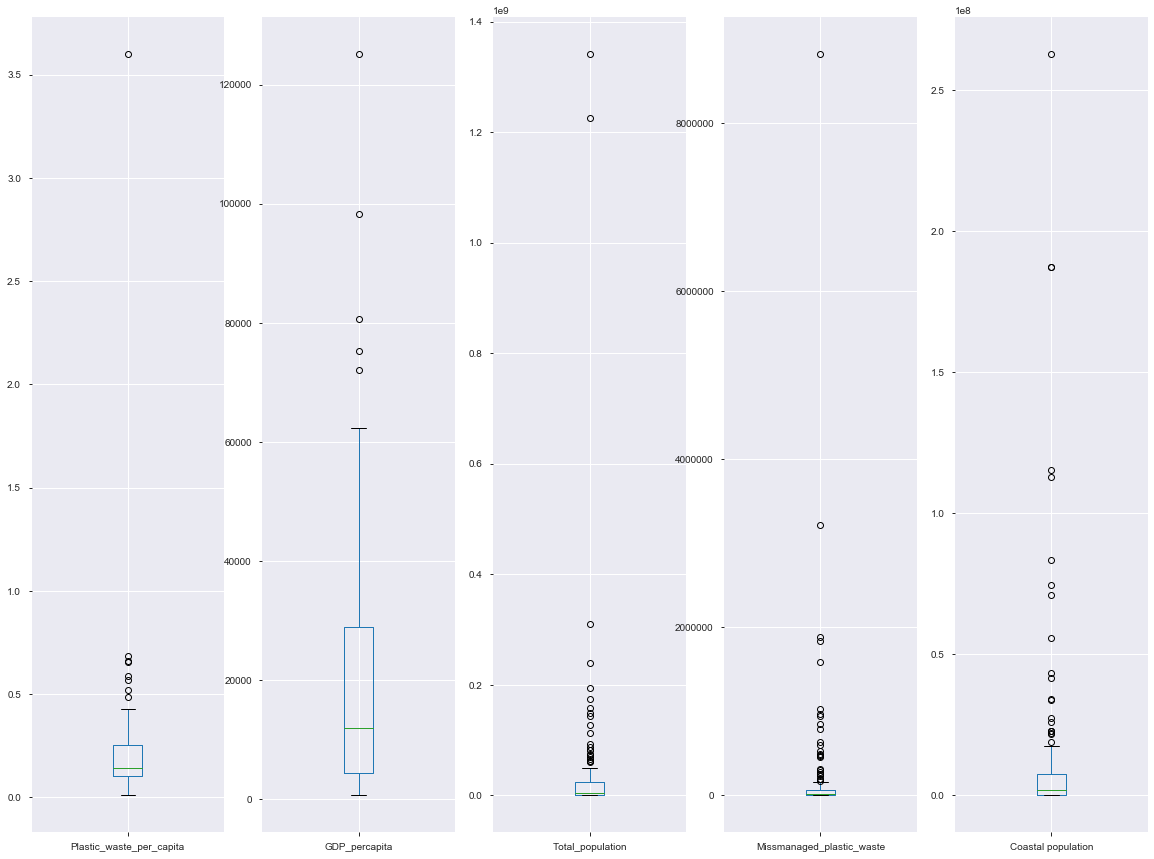

In [50]:
# Plot all the numerical variables using boxplots
df.plot(kind =  'box', subplots = True, figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12440d8d0>,
      dtype=object)

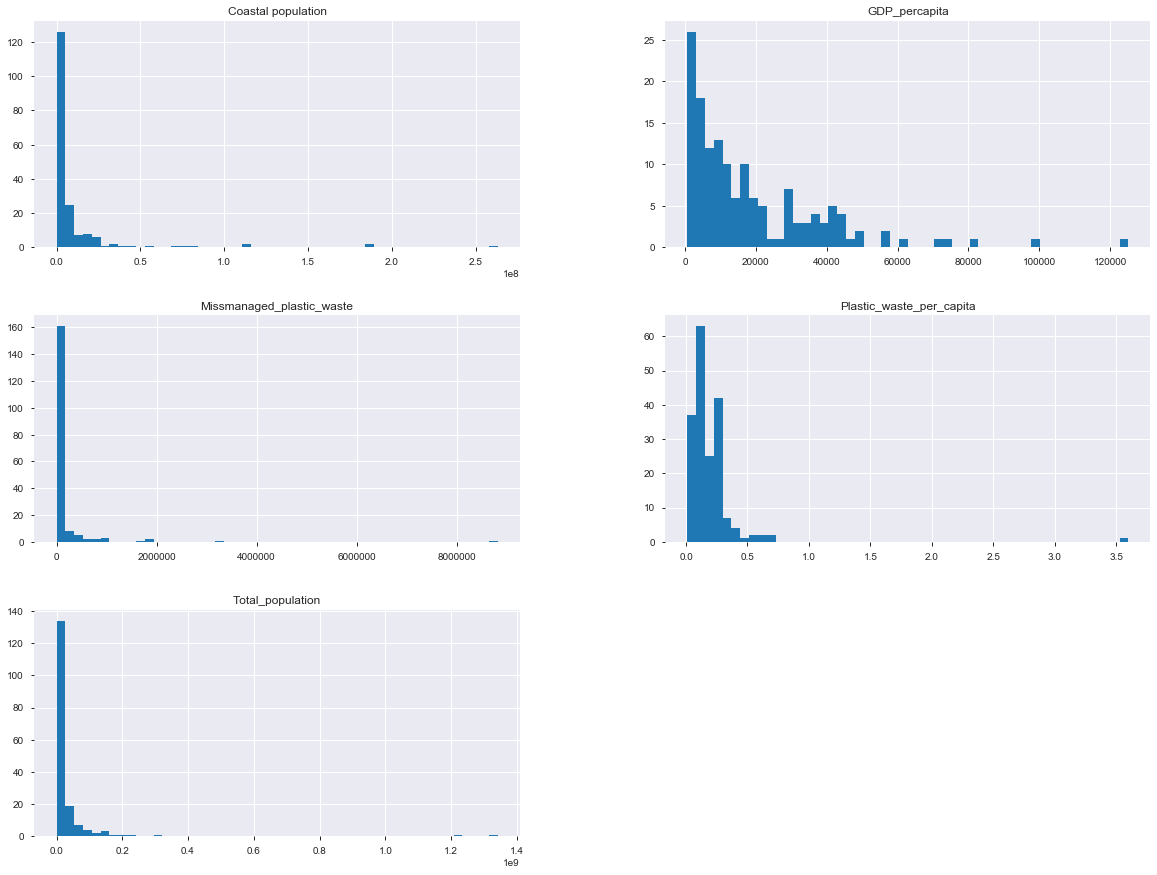

In [51]:
# Check out the distribution of the numerical variables 
df.hist(bins = 50, figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124d4d190>,
      dtype=object)

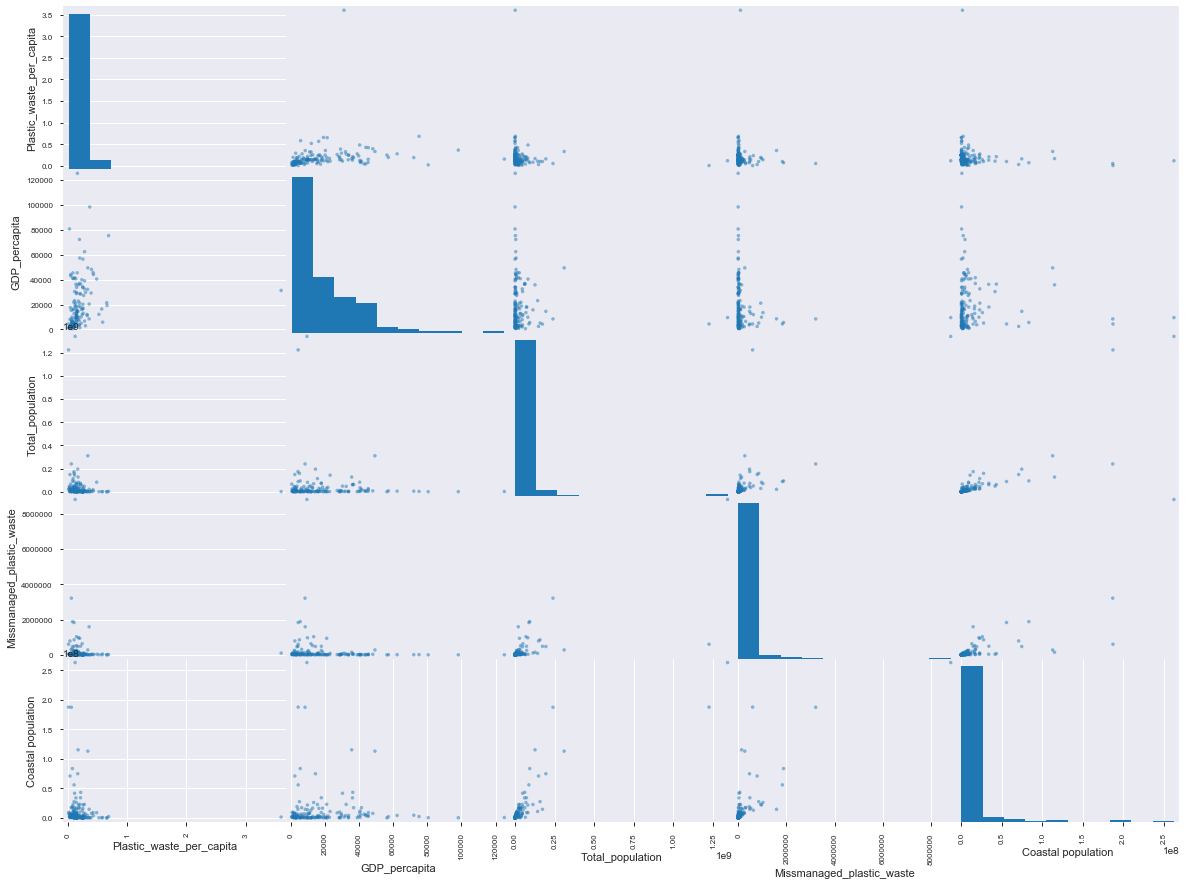

In [52]:
# Check out the distribution of the variables and the scatterplots using a single line of code
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize = (20,15))

In [53]:
# Use the function profile report 
df.profile_report()

In [54]:
# Calculate a new variable called WMPW stands for World's missmanaged plastic waste
# Use the fucntion sum of the column df['Missmanaged_plastic_waste']

WMPW = df['Missmanaged_plastic_waste'].sum()

print('In 2011 the amount of tones of plastic missmanaged around the world was:', 
      '{:1}'.format(WMPW))

In 2011 the amount of tones of plastic missmanaged around the world was: 31843991


In [55]:
# Now let's create a new variable called PGC, which takes each entry and returns the global percentage
df['PGC'] = df['Missmanaged_plastic_waste']*100/WMPW

In [56]:
# Check the head
df.head()

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Missmanaged_plastic_waste,Coastal population,PGC
1,Albania,ALB,0.069,9927.181841,3204284.0,29705,2530533,0.093283
2,Algeria,DZA,0.144,12870.602699,35468208.0,520555,16556580,1.634704
3,Angola,AGO,0.062,5897.682841,19081912.0,62528,3790041,0.196357
4,Anguilla,AIA,0.252,NaN,15358.0,52,14561,0.000163
5,Antigua and Barbuda,ATG,0.660,19212.720131,88710.0,1253,66843,0.003935


In [57]:
# Sorth df in a descending way on the column PGC
df.sort_values('PGC', ascending= False,inplace =True)

In [58]:
# Use the function .cumsum() to calculate a cumulative sum of the column PGC
# Save it in a variable called Cumulative_percentage
df['Cumulative_percentage'] = df['PGC'].cumsum()

In [59]:
# Check the first 15 entries
df.head(15)

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Missmanaged_plastic_waste,Coastal population,PGC,Cumulative_percentage
29,China,CHN,0.121,9525.818483,1.341335e+09,8819717,262892387,27.696645,27.696645
81,Indonesia,IDN,0.057,8433.497357,2.398709e+08,3216856,187223476,10.101925,37.798569
135,Philippines,PHL,0.075,5596.837288,9.326080e+07,1883659,83446862,5.915273,43.713842
185,Vietnam,VNM,0.103,4408.168612,8.784844e+07,1833819,55858245,5.758760,49.472602
162,Sri Lanka,LKA,0.357,8529.571442,2.085995e+07,1591179,14568174,4.996795,54.469397
169,Thailand,THA,0.144,13486.562415,6.912223e+07,1027739,26043442,3.227419,57.696816
48,Egypt,EGY,0.178,9857.468282,8.112108e+07,967012,21750943,3.036717,60.733534
100,Malaysia,MYS,0.198,21107.267937,2.840102e+07,936818,22890252,2.941899,63.675433
122,Nigeria,NGA,0.103,5150.158818,1.584232e+08,851493,27477112,2.673952,66.349384
11,Bangladesh,BGD,0.034,2442.728888,1.486921e+08,787327,70874124,2.472451,68.821835


In [60]:
# Reset the index and drop the index
df.reset_index(inplace=True)
df.drop('index', axis =1, inplace=True)

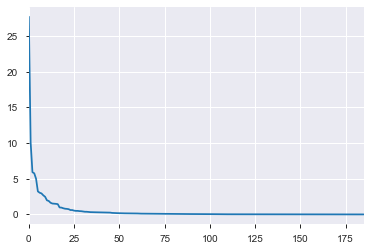

In [61]:
# Plot PGC
df.PGC.plot()

In [62]:
# Save the top 15 entries in a variable called top15
top15 = df.head(15)


In [63]:
# Use .info()
top15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
Countries                    15 non-null object
Code                         15 non-null object
Plastic_waste_per_capita     15 non-null float64
GDP_percapita                15 non-null float64
Total_population             15 non-null float64
Missmanaged_plastic_waste    15 non-null int64
Coastal population           15 non-null int64
PGC                          15 non-null float64
Cumulative_percentage        15 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.1+ KB


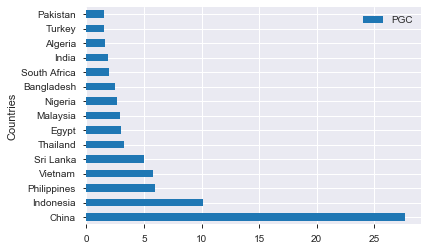

In [64]:
# Plot the column PGC and countries using a horizontal bar plot
top15.plot(x= 'Countries', y = 'PGC', kind = 'barh')

### Last challenge 
**How many countries mismanage plastic waste below the world's average?**

In [65]:
# Claculate how many countries mismanage plastic waste below the world's average
df['Countries'][df['Missmanaged_plastic_waste'] < df['Missmanaged_plastic_waste'].mean()].count()

161

In [66]:
# For how many contries do we have data?
df['Countries'].count()

186

In [67]:
# Print how many countries produce more plastic than the average
print( 186-161, "countries produce more missmanaged plastic than the world's average")

25 countries produce more missmanaged plastic than the world's average


In [68]:
# Calculate the percentage contribution of amount of mismanaged plastic waste per capita in kg/day
## create a variable WPPCC - plastic per capita in a day
WPPCC = df['Plastic_waste_per_capita'].sum()
print('In 2011 the amount of kilograms per day per person of plastic missmanaged around the world was:',
      '{:3.4}'.format(WPPCC), 'Kg')

In 2011 the amount of kilograms per day per person of plastic missmanaged around the world was: 36.75 Kg


In [69]:
# Create a new column with the name PercentagePerCapita 
# which is the percentage of the per capita plastic missmanaged per day
df['PercentagePerCapita'] = df['Plastic_waste_per_capita']*100/WPPCC

In [70]:
# Check the head
df.head()

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Missmanaged_plastic_waste,Coastal population,PGC,Cumulative_percentage,PercentagePerCapita
0,China,CHN,0.121,9525.818483,1.341335e+09,8819717,262892387,27.696645,27.696645,0.329207
1,Indonesia,IDN,0.057,8433.497357,2.398709e+08,3216856,187223476,10.101925,37.798569,0.155081
2,Philippines,PHL,0.075,5596.837288,9.326080e+07,1883659,83446862,5.915273,43.713842,0.204054
3,Vietnam,VNM,0.103,4408.168612,8.784844e+07,1833819,55858245,5.758760,49.472602,0.280234
4,Sri Lanka,LKA,0.357,8529.571442,2.085995e+07,1591179,14568174,4.996795,54.469397,0.971296


In [71]:
# sort df on PercentagePerCapita, ascending= False
df.sort_values('PercentagePerCapita', ascending= False, inplace =True)

In [72]:
# Check the top 15
df.head(15)

,Countries,Code,Plastic_waste_per_capita,GDP_percapita,Total_population,Missmanaged_plastic_waste,Coastal population,PGC,Cumulative_percentage,PercentagePerCapita
38,Trinidad and Tobago,TTO,3.600,31260.907047,1341465.0,94066,1358433,0.295396,92.082871,9.794586
102,Kuwait,KWT,0.686,75204.145117,2736732.0,11489,2293604,0.036079,99.335564,1.866413
145,Antigua and Barbuda,ATG,0.660,19212.720131,88710.0,1253,66843,0.003935,99.963880,1.795674
151,Saint Kitts and Nevis,KNA,0.654,21412.201453,52402.0,715,36102,0.002245,99.978225,1.779350
60,Guyana,GUY,0.586,5847.857255,754493.0,42002,513235,0.131899,96.432024,1.594341
129,Barbados,BRB,0.570,16417.962452,273331.0,3483,276784,0.010938,99.849843,1.550809
109,Saint Lucia,LCA,0.522,12123.835139,174267.0,6709,163227,0.021068,99.530285,1.420215
68,Germany,DEU,0.485,40428.721031,82302465.0,31239,8837035,0.098100,97.279703,1.319548
101,Ireland,IRL,0.430,44030.414149,4469900.0,11710,3749576,0.036773,99.299485,1.169909
73,Netherlands,NLD,0.424,45524.662143,16612988.0,27700,8971770,0.086987,97.729760,1.153585


In [73]:
# create top15 which is the top 15 countries based on PercentagePerCapita
top15 = df.head(15)

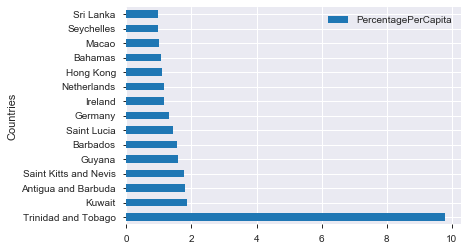

In [74]:
# Plot the column PercentagePerCapita and countries using a horizontal bar plot
top15.plot(x= 'Countries', y = 'PercentagePerCapita', kind = 'barh')